In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('clean_data/cleaned_churn.csv')

In [5]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [6]:
df.shape

(3333, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   int64  
 4   Voice mail plan         3333 non-null   int64  
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
col_to_drop = ['Number vmail messages', 'Total day minutes', 'Total eve minutes',
               'Total night minutes', 'Total intl minutes']
df = df.drop(columns=col_to_drop)

In [9]:
df.shape

(3333, 15)

In [10]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
df.sample(5)

,State,Account length,Area code,International plan,Voice mail plan,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
2137,NM,107,415,0,0,101,37.79,111,24.31,117,11.22,4,3.27,1,1
1212,MT,96,415,0,0,98,16.59,118,8.97,105,9.91,9,3.13,1,0
1867,NH,174,408,0,0,96,23.70,108,12.19,107,10.13,5,2.70,2,0
430,NM,41,415,0,0,74,39.46,88,27.80,119,10.19,2,2.94,3,1
1276,MA,127,408,1,0,110,30.07,100,14.27,138,8.20,2,2.08,1,1


<Axes: xlabel='Churn', ylabel='count'>

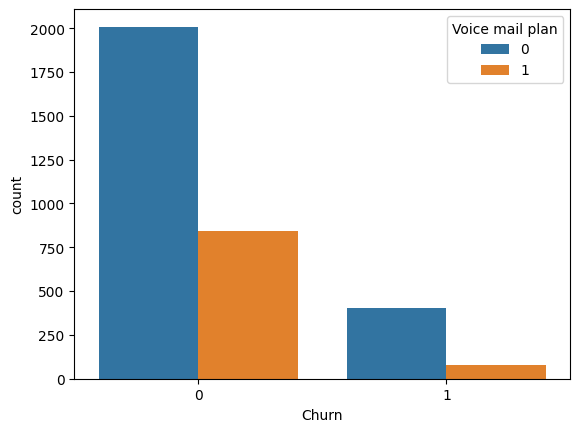

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Churn',hue='Voice mail plan' ,data=df)

In [14]:
df.groupby('Churn')['Voice mail plan'].value_counts()


Churn  Voice mail plan
0      0                  2008
       1                   842
1      0                   403
       1                    80
Name: count, dtype: int64

In [15]:
cat_cols = ['State', 'Area code']
bin_cols = ['International plan', 'Voice mail plan']

num_cols = [
    'Account length', 'Total day calls', 'Total day charge',
    'Total eve calls', 'Total eve charge',
    'Total night calls', 'Total night charge',
    'Total intl calls', 'Total intl charge',
    'Customer service calls'
]

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop='first', handle_unknown="ignore", dtype=int), cat_cols),
        ("num", StandardScaler(), num_cols),
        ("bin", "passthrough", bin_cols)
    ]
)

In [17]:
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(
        random_state=42,
        max_depth= 7,
        min_samples_leaf = 2,
        min_samples_split = 5
    ))
])

clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['State', 'Area code']),
                                                 ('num', StandardScaler(),
                                                  ['Account length',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night calls',
                                                   'Total night charge',
                                                   'Total intl calls',
                                                   'Total intl charge',
                                                   'Customer service calls']),
                                                 ('bin', 'passthrough',
                                                  ['International plan',
                                                   'Voice mail plan'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=7, min_samples_leaf=2,
                                        min_samples_split=5,
                                        random_state=42))])

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9460269865067467

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       570
           1       0.87      0.74      0.80        97

    accuracy                           0.95       667
   macro avg       0.91      0.86      0.88       667
weighted avg       0.94      0.95      0.94       667


Confusion Matrix:
 [[559  11]
 [ 25  72]]


In [24]:
import pickle

with open("clean_data/churn_pipeline.pkl", "wb") as f:
    pickle.dump(clf, f)